In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
url = "https://raw.githubusercontent.com/ozlerhakan/mongodb-json-files/master/datasets/grades.json"
req = requests.get(url)

In [ ]:
req

<Response [200]>

In [ ]:
soup = BeautifulSoup(req.content)

In [ ]:
soup

<html><body><p>{ "_id" : { "$oid" : "50b59cd75bed76f46522c34e" }, "student_id" : 0, "class_id" : 2, "scores" : [ { "type" : "exam", "score" : 57.92947112575566 }, { "type" : "quiz", "score" : 21.24542588206755 }, { "type" : "homework", "score" : 68.19567810587429 }, { "type" : "homework", "score" : 67.95019716560351 }, { "type" : "homework", "score" : 18.81037253352722 } ] }
{ "_id" : { "$oid" : "50b59cd75bed76f46522c34f" }, "student_id" : 0, "class_id" : 28, "scores" : [ { "type" : "exam", "score" : 39.17749400402234 }, { "type" : "quiz", "score" : 78.44172815491468 }, { "type" : "homework", "score" : 20.81782269075502 }, { "type" : "homework", "score" : 70.44520452408949 }, { "type" : "homework", "score" : 50.66616327819226 }, { "type" : "homework", "score" : 53.84983118363991 } ] }
{ "_id" : { "$oid" : "50b59cd75bed76f46522c350" }, "student_id" : 0, "class_id" : 5, "scores" : [ { "type" : "exam", "score" : 88.22950674232497 }, { "type" : "quiz", "score" : 79.28962650427184 }, { "typ

In [ ]:
df = pd.read_json("https://raw.githubusercontent.com/ozlerhakan/mongodb-json-files/master/datasets/grades.json", lines=True)

In [ ]:
df

,_id,student_id,class_id,scores
0,{'$oid': '50b59cd75bed76f46522c34e'},0,2,"[{'type': 'exam', 'score': 57.92947112575566},..."
1,{'$oid': '50b59cd75bed76f46522c34f'},0,28,"[{'type': 'exam', 'score': 39.17749400402234},..."
2,{'$oid': '50b59cd75bed76f46522c350'},0,5,"[{'type': 'exam', 'score': 88.22950674232497},..."
3,{'$oid': '50b59cd75bed76f46522c351'},0,16,"[{'type': 'exam', 'score': 59.1805667559299}, ..."
4,{'$oid': '50b59cd75bed76f46522c352'},0,24,"[{'type': 'exam', 'score': 4.444435759027499},..."
...,...,...,...,...
275,{'$oid': '50b59cd75bed76f46522c461'},48,10,"[{'type': 'exam', 'score': 19.75901367795435},..."
276,{'$oid': '50b59cd75bed76f46522c462'},48,14,"[{'type': 'exam', 'score': 66.79008851052096},..."
277,{'$oid': '50b59cd75bed76f46522c463'},48,8,"[{'type': 'exam', 'score': 87.50309579619501},..."
278,{'$oid': '50b59cd75bed76f46522c464'},48,15,"[{'type': 'exam', 'score': 17.49112864462374},..."


In [ ]:
for i in range(len(df._id)):
  df._id[i] = re.sub("^{.* '|'}",'',str(df._id[i]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df

,_id,student_id,class_id,scores
0,50b59cd75bed76f46522c34e,0,2,"[{'type': 'exam', 'score': 57.92947112575566},..."
1,50b59cd75bed76f46522c34f,0,28,"[{'type': 'exam', 'score': 39.17749400402234},..."
2,50b59cd75bed76f46522c350,0,5,"[{'type': 'exam', 'score': 88.22950674232497},..."
3,50b59cd75bed76f46522c351,0,16,"[{'type': 'exam', 'score': 59.1805667559299}, ..."
4,50b59cd75bed76f46522c352,0,24,"[{'type': 'exam', 'score': 4.444435759027499},..."
...,...,...,...,...
275,50b59cd75bed76f46522c461,48,10,"[{'type': 'exam', 'score': 19.75901367795435},..."
276,50b59cd75bed76f46522c462,48,14,"[{'type': 'exam', 'score': 66.79008851052096},..."
277,50b59cd75bed76f46522c463,48,8,"[{'type': 'exam', 'score': 87.50309579619501},..."
278,50b59cd75bed76f46522c464,48,15,"[{'type': 'exam', 'score': 17.49112864462374},..."


In [ ]:
df.scores[0]

[{'score': 57.92947112575566, 'type': 'exam'},
 {'score': 21.24542588206755, 'type': 'quiz'},
 {'score': 68.1956781058743, 'type': 'homework'},
 {'score': 67.95019716560351, 'type': 'homework'},
 {'score': 18.81037253352722, 'type': 'homework'}]

In [ ]:
3 Columns -> exam_score, quiz_score, homework_score
._ _

Final output -> id, student_id, class id, exam_score, quiz_score, homework_score

In [ ]:
# List Comprehension
exam_score = [round(float(re.sub('^{.*: |}','',str(df['scores'][i][0]))),2) for i in range(len(df['scores']))]
quiz_score = [round(float(re.sub('^{.*: |}','',str(df['scores'][i][1]))),2) for i in range(len(df['scores']))]
homework_score=[round(sum(list(map(float,re.findall('\d+.\d+',str(df['scores'][i][2:])))))/len(list(map(float,re.findall('\d+.\d+',str(df['scores'][i][2:]))))),2) for i in range(len(df['scores']))]

In [ ]:
# Assignment
df['scores'][:][1]

{'score': 79.28962650427184, 'type': 'quiz'}

In [ ]:
new_df = pd.DataFrame({"id":df['_id'], "student_id":df['student_id'], "class_id":df['class_id'],
                       "exam_score":exam_score,"quiz_score":quiz_score, "homework_score":homework_score})

In [ ]:
new_df

,id,student_id,class_id,exam_score,quiz_score,homework_score
0,50b59cd75bed76f46522c34e,0,2,57.93,21.25,51.65
1,50b59cd75bed76f46522c34f,0,28,39.18,78.44,48.94
2,50b59cd75bed76f46522c350,0,5,88.23,79.29,37.29
3,50b59cd75bed76f46522c351,0,16,59.18,47.59,51.12
4,50b59cd75bed76f46522c352,0,24,4.44,28.63,85.35
...,...,...,...,...,...,...
275,50b59cd75bed76f46522c461,48,10,19.76,88.30,30.80
276,50b59cd75bed76f46522c462,48,14,66.79,6.84,84.03
277,50b59cd75bed76f46522c463,48,8,87.50,77.95,60.19
278,50b59cd75bed76f46522c464,48,15,17.49,26.63,52.28


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              280 non-null    object 
 1   student_id      280 non-null    int64  
 2   class_id        280 non-null    int64  
 3   exam_score      280 non-null    float64
 4   quiz_score      280 non-null    float64
 5   homework_score  280 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
new_df.describe()

,student_id,class_id,exam_score,quiz_score,homework_score
count,280.000000,280.000000,280.000000,280.000000,280.000000
mean,23.717857,15.096429,50.831143,48.960893,48.654464
std,14.314029,8.958766,28.709625,29.398710,20.154817
min,0.000000,0.000000,0.500000,0.720000,4.790000
25%,11.000000,7.000000,24.117500,23.837500,34.517500
50%,24.000000,15.500000,49.685000,49.850000,48.370000
75%,37.000000,23.000000,75.517500,72.822500,61.672500
max,49.000000,30.000000,99.980000,99.910000,98.920000


In [ ]:
new_df.drop(['student_id'],inplace=True,axis=1)

In [ ]:
new_df

,id,exam_score,quiz_score,homework_score
0,50b59cd75bed76f46522c34e,57.93,21.25,51.65
1,50b59cd75bed76f46522c34f,39.18,78.44,48.94
2,50b59cd75bed76f46522c350,88.23,79.29,37.29
3,50b59cd75bed76f46522c351,59.18,47.59,51.12
4,50b59cd75bed76f46522c352,4.44,28.63,85.35
...,...,...,...,...
275,50b59cd75bed76f46522c461,19.76,88.30,30.80
276,50b59cd75bed76f46522c462,66.79,6.84,84.03
277,50b59cd75bed76f46522c463,87.50,77.95,60.19
278,50b59cd75bed76f46522c464,17.49,26.63,52.28


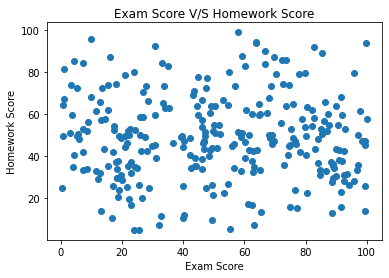

In [ ]:
x = new_df.exam_score
y = new_df.homework_score
plt.scatter(x,y)
plt.xlabel('Exam Score')
plt.ylabel('Homework Score')
plt.title('Exam Score V/S Homework Score')
plt.show()

# Project 3

* Import Libraries

In [6]:
# Numpy
import numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# RegEx
import re

Steps

1. Converting the JSON data into a DataFrame
2. Explore the data
3. Clean & Manipulate the data
4. Analysis of Data
5. Conclusion

1. Converting the JSON data into a DataFrame

JSON Data URL: https://raw.githubusercontent.com/ozlerhakan/mongodb-json-files/master/datasets/books.json

In [170]:
df = pd.read_json('https://raw.githubusercontent.com/ozlerhakan/mongodb-json-files/master/datasets/books.json',lines = True)

2. Data Exploration

In [ ]:
df.head()

In [ ]:
# Printing all the columns
df.columns

In [ ]:
# Total number of columns
df.shape[1]

In [ ]:
# Statistical Data
df.describe()

In [ ]:
df.tail()

In [ ]:
# Total number of null values in each columns
df.isnull().sum()

In [ ]:
df.info()

3. Data Cleaning

In [ ]:
df.head()

In [ ]:
df.tail()

* Clean the ISBN column

In [ ]:
re.sub('[A-Za-z]*|\n+|-+|,+|:+','',str(df['isbn']))

In [ ]:
df.info()

In [ ]:
# List all those rows in the isbn column where the isbn value is null
df[df.isbn.isna()]

In [ ]:
# Returning all the rows where the value of isbn is NaN/Null
df[df['isbn'].isna()== True]

In [171]:
# Dropping off the columns 'isbn'
df.drop('isbn',axis = 1,inplace = True)

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
# Getting the total number of title ()Unique
len(df.title.unique())

In [ ]:
# Show the duplicated rows w.r.t. the title
df[df.title.duplicated()]

In [172]:
# Delete all the duplicate values
df.drop_duplicates('title',inplace=True)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 427 entries, 0 to 430
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _id               427 non-null    object
 1   title             427 non-null    object
 2   pageCount         427 non-null    int64 
 3   publishedDate     350 non-null    object
 4   thumbnailUrl      408 non-null    object
 5   shortDescription  159 non-null    object
 6   longDescription   262 non-null    object
 7   status            427 non-null    object
 8   authors           427 non-null    object
 9   categories        427 non-null    object
dtypes: int64(1), object(9)
memory usage: 36.7+ KB


In [148]:
df.shape

(427, 10)

In [173]:
# Rearrange the values of the _id column
df['_id']= np.arange(1,428)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 427 entries, 0 to 430
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _id               427 non-null    int64 
 1   title             427 non-null    object
 2   pageCount         427 non-null    int64 
 3   publishedDate     350 non-null    object
 4   thumbnailUrl      408 non-null    object
 5   shortDescription  159 non-null    object
 6   longDescription   262 non-null    object
 7   status            427 non-null    object
 8   authors           427 non-null    object
 9   categories        427 non-null    object
dtypes: int64(2), object(8)
memory usage: 36.7+ KB


In [174]:
# Reindexing
df = df.reset_index(drop=True)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _id               427 non-null    int64 
 1   title             427 non-null    object
 2   pageCount         427 non-null    int64 
 3   publishedDate     350 non-null    object
 4   thumbnailUrl      408 non-null    object
 5   shortDescription  159 non-null    object
 6   longDescription   262 non-null    object
 7   status            427 non-null    object
 8   authors           427 non-null    object
 9   categories        427 non-null    object
dtypes: int64(2), object(8)
memory usage: 33.5+ KB


In [ ]:
df.tail()

In [176]:
# Replace the values in the pageCount column where the value == 0 with the mean of the 
# mean (rounded off & dtype=int) of pageCount column elements

mean = round(np.mean(df.pageCount))
df['pageCount']=df['pageCount'].replace(0,mean)

In [ ]:
df.info()

In [ ]:
df

In [227]:
data = df.copy()

In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _id               427 non-null    int64 
 1   title             427 non-null    object
 2   pageCount         427 non-null    int64 
 3   publishedYear     350 non-null    object
 4   thumbnailUrl      408 non-null    object
 5   shortDescription  159 non-null    object
 6   longDescription   262 non-null    object
 7   status            427 non-null    object
 8   authors           427 non-null    object
 9   categories        427 non-null    object
dtypes: int64(2), object(8)
memory usage: 33.5+ KB


In [237]:
data.publishedYear.fillna("0",inplace=True)

In [235]:
for i in range(len(data.publishedYear)):
  data.publishedYear[i] = re.sub("^{.*: '|-.*}","",str(df['publishedYear'][i]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data.head()

In [ ]:
data.head()

In [ ]:
data.info()

In [262]:
# data[data.publishedYear.isna()]

data.publishedYear.loc[[96]]
# data.publishedYear = data.publishedYear.replace('nan','0')

96    1645
Name: publishedYear, dtype: int64

In [249]:
data.publishedYear = data.publishedYear.astype(int)

In [ ]:
data.info()

In [261]:
mean = round(np.mean(data.publishedYear))
data['publishedYear']=data['publishedYear'].replace(0,mean)

In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _id               427 non-null    int64 
 1   title             427 non-null    object
 2   pageCount         427 non-null    int64 
 3   publishedYear     427 non-null    int64 
 4   thumbnailUrl      408 non-null    object
 5   shortDescription  159 non-null    object
 6   longDescription   262 non-null    object
 7   status            427 non-null    object
 8   authors           427 non-null    object
 9   categories        427 non-null    object
dtypes: int64(3), object(7)
memory usage: 33.5+ KB


In [266]:
data.drop(['thumbnailUrl','shortDescription','longDescription'],axis = 1,inplace = True)

In [268]:
data.status.unique()

array(['PUBLISH', 'MEAP'], dtype=object)

In [270]:
data['status'].value_counts()

PUBLISH    360
MEAP        67
Name: status, dtype: int64

In [271]:
# MEAP to UNPUBLISH
data['status']=data['status'].replace('MEAP','UNPUBLISH')

In [272]:
data['status'].value_counts()

PUBLISH      360
UNPUBLISH     67
Name: status, dtype: int64

In [273]:
data.authors

0          [W. Frank Ableson, Charlie Collins, Robi Sen]
1                           [W. Frank Ableson, Robi Sen]
2                                          [Gojko Adzic]
3            [Tariq Ahmed with Jon Hirschi, Faisal Abid]
4      [Tariq Ahmed, Dan Orlando, John C. Bland II, J...
                             ...                        
422                                                   []
423                                                   []
424                                                   []
425                                                   []
426                                                   []
Name: authors, Length: 427, dtype: object

In [279]:
# Print the total numbers of [] in the author coulmn




In [282]:
# Drop _id, authors, categories columns

data.drop(['_id','authors','categories'],axis = 1,inplace = True)

In [ ]:
data

In [284]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          427 non-null    object
 1   pageCount      427 non-null    int64 
 2   publishedYear  427 non-null    int64 
 3   status         427 non-null    object
dtypes: int64(2), object(2)
memory usage: 13.5+ KB


# Data Analysis

In [286]:
data.head()

,title,pageCount,publishedYear,status
0,Unlocking Android,416,2009,PUBLISH
1,"Android in Action, Second Edition",592,2011,PUBLISH
2,Specification by Example,288,2011,PUBLISH
3,Flex 3 in Action,576,2009,PUBLISH
4,Flex 4 in Action,600,2010,PUBLISH


1. Plot a graph to show all the counts of the categories in the status column

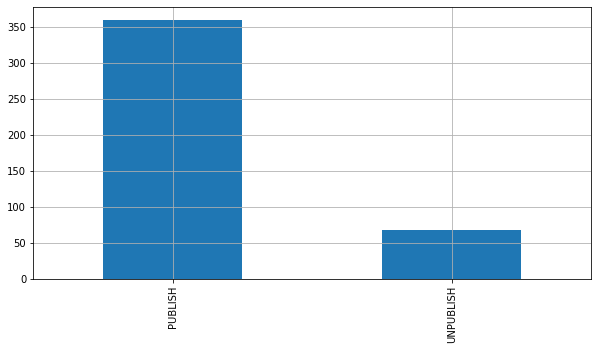

In [290]:
data['status'].value_counts().plot.bar(figsize=(10,5))
plt.grid()

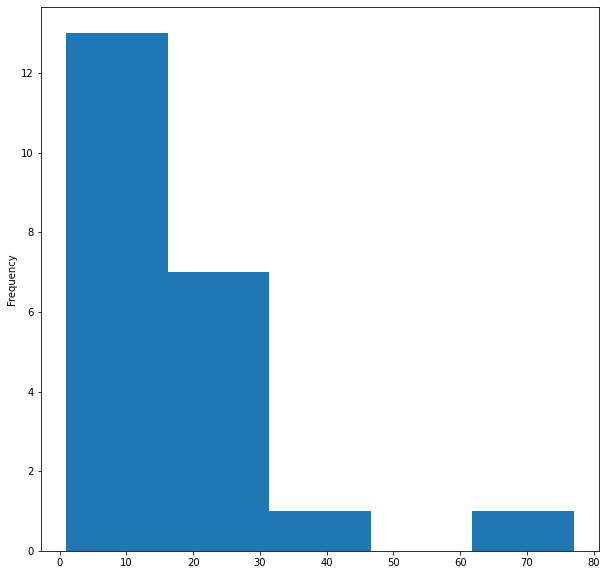

In [298]:
# data['publishedYear'].value_counts()
# low = 1645
# high = 2014

# 1600 - 1700
# 1700 - 1800
# 1800 - 1900
# 1900 - 2000
# 2000 - 2100
data['publishedYear'].value_counts().plot.hist(figsize=(10,10), bins=5)


(array([13.,  7.,  1.,  0.,  1.]),
 array([ 1. , 16.2, 31.4, 46.6, 61.8, 77. ]),
 <a list of 5 Patch objects>)

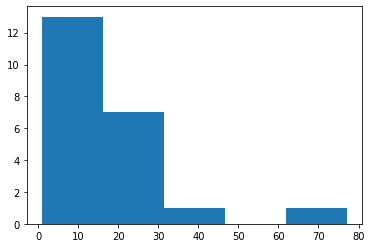

In [296]:
x=data['publishedYear'].value_counts()
plt.hist(x,bins=5)

In [297]:
data['publishedYear'].value_counts()

1645    77
2011    38
2012    31
2013    31
2009    25
2005    23
2002    23
2010    21
2008    19
2014    16
2003    15
2007    14
2004    13
1999    13
1997    13
1998    12
2006    11
2000    10
1996     9
1995     7
2001     5
1993     1
Name: publishedYear, dtype: int64

In [300]:
data

,title,pageCount,publishedYear,status
0,Unlocking Android,416,2009,PUBLISH
1,"Android in Action, Second Edition",592,2011,PUBLISH
2,Specification by Example,288,2011,PUBLISH
3,Flex 3 in Action,576,2009,PUBLISH
4,Flex 4 in Action,600,2010,PUBLISH
...,...,...,...,...
422,DSLs in Action,376,2010,PUBLISH
423,Database Programming for Handheld Devices,288,2000,PUBLISH
424,Jakarta Commons Online Bookshelf,402,2005,PUBLISH
425,Browsing with HttpClient,288,2005,PUBLISH


In [304]:
# List out the top 10 books that has the highest number of pages

data.sort_values('pageCount',ascending=False).head(10)

,title,pageCount,publishedYear,status
231,Making Sense of Java,180,1996,PUBLISH
214,The Cloud at Your Service,200,2010,PUBLISH
121,Object Technology Centers of Excellence,200,1996,PUBLISH
154,Comprehensive Networking Glossary and Acronym ...,208,1995,PUBLISH
238,Implementing PeopleSoft Financials,220,1997,PUBLISH
43,Practical Methods for Your Year 2000 Problem,236,1998,PUBLISH
216,SOA Patterns,250,2012,PUBLISH
11,Hello! Flex 4,258,2009,PUBLISH
116,Technology Paradise Lost,260,2004,PUBLISH
7,Flex on Java,265,2010,PUBLISH


In [305]:
# List out the top 10 books that has the lowest number of pages

data.sort_values('pageCount').head(10)

,title,pageCount,publishedYear,status
231,Making Sense of Java,180,1996,PUBLISH
214,The Cloud at Your Service,200,2010,PUBLISH
121,Object Technology Centers of Excellence,200,1996,PUBLISH
154,Comprehensive Networking Glossary and Acronym ...,208,1995,PUBLISH
238,Implementing PeopleSoft Financials,220,1997,PUBLISH
43,Practical Methods for Your Year 2000 Problem,236,1998,PUBLISH
216,SOA Patterns,250,2012,PUBLISH
11,Hello! Flex 4,258,2009,PUBLISH
116,Technology Paradise Lost,260,2004,PUBLISH
7,Flex on Java,265,2010,PUBLISH


In [306]:
data.head(10)

,title,pageCount,publishedYear,status
0,Unlocking Android,416,2009,PUBLISH
1,"Android in Action, Second Edition",592,2011,PUBLISH
2,Specification by Example,288,2011,PUBLISH
3,Flex 3 in Action,576,2009,PUBLISH
4,Flex 4 in Action,600,2010,PUBLISH
5,Collective Intelligence in Action,425,2008,PUBLISH
6,Zend Framework in Action,432,2008,PUBLISH
7,Flex on Java,265,2010,PUBLISH
8,Griffon in Action,375,2012,PUBLISH
9,OSGi in Depth,325,2011,PUBLISH


<BarContainer object of 10 artists>

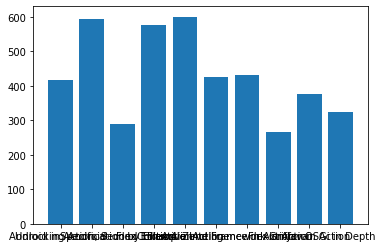

In [309]:
x=data.head(10)['title']
y=data.head(10)['pageCount']
plt.bar(x,y)

<BarContainer object of 10 artists>

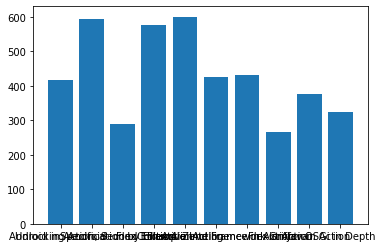

In [311]:
x = data.title.head(10)
y=data.pageCount.head(10)
plt.bar(x,y)

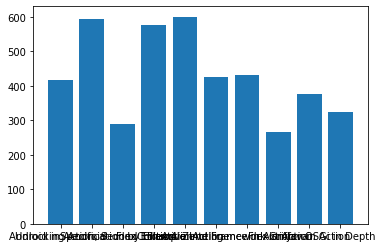

In [312]:
x = data.title.head(10)
y = data.pageCount.head(10)
plt.bar(x,y)

plt.show()